In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def makeDummyImage():
    image = np.zeros((10, 10), dtype=np.uint8)
    image[2:6, 2:6] = 255
    image[6:8, 6:8] = 255
    image[7:9, 3:5] = 255
    return image

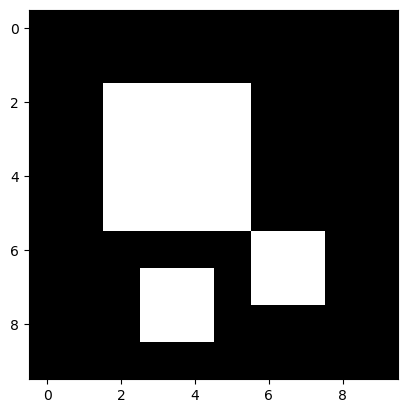

In [3]:
image = makeDummyImage()
plt.imshow(image, cmap=plt.cm.gray)

In [4]:
def getProirNeighbourLabels(image, r, c):
    return [label for label in image[r-1:r+1, c-1:c+1].flatten()[:-1] if label]

In [5]:
def getLabel(table, label):
    while len(table[label]):
        label = min(table[label])
    return label

In [6]:
def fixEquivalenceTable(table, key, label):
    if label not in table[key]:
        table[key].append(label)
        for otherLabel in table[key][:-1]:
            fixEquivalenceTable(table, otherLabel, label)

In [7]:
def equalizeNormalizeLabeledImage(labeledImage, equivalenceTable):
    newTable = {}
    for r in range(labeledImage.shape[0]):
        for c in range(labeledImage.shape[1]):
            if labeledImage[r][c]:
                label = getLabel(equivalenceTable, labeledImage[r][c])
                if label not in newTable:
                    newTable[label] = len(newTable.keys()) + 1
                labeledImage[r][c] = newTable[label]
    return len(newTable), labeledImage

In [8]:
def getConnectedComponent(image):
    labeledImage = np.zeros_like(image)
    equivalenceTable = {}
    for r in range(image.shape[0]):
        for c in range(image.shape[1]):
            if image[r][c]:
                neighbourLabels = getProirNeighbourLabels(labeledImage, r, c)
                if len(neighbourLabels) == 0:
                    newLabel = len(list(equivalenceTable.keys())) + 1
                    equivalenceTable[newLabel] = []
                    labeledImage[r][c] = newLabel
                else:
                    label = getLabel(equivalenceTable, min(neighbourLabels))
                    labeledImage[r][c] = label
                    for l in neighbourLabels:
                        if l != label:
                            fixEquivalenceTable(equivalenceTable, l, label)     
    return equalizeNormalizeLabeledImage(labeledImage, equivalenceTable)

#Labels:  2


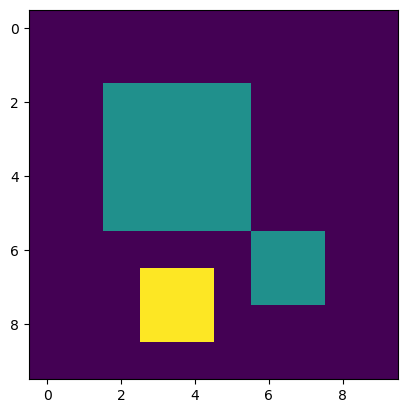

In [9]:
numLabels, labeledImage = getConnectedComponent(image)
print("#Labels: ", numLabels)
plt.imshow(labeledImage)

(300, 300)


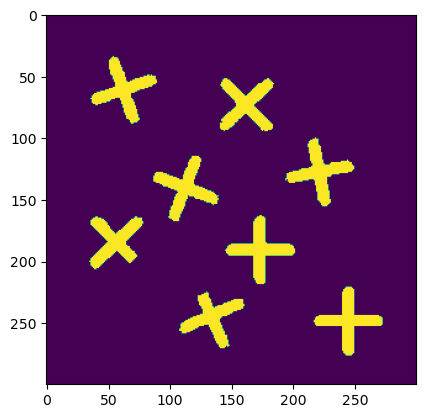

In [10]:
imagesDir = os.path.join("..\\..\\", "images", "Binary")
imagePath = os.path.join(imagesDir, "MultipleObjects3.png")
image     = cv2.imread(imagePath, cv2.IMREAD_UNCHANGED)
print(image.shape)
plt.imshow(image)

#Labels:  8


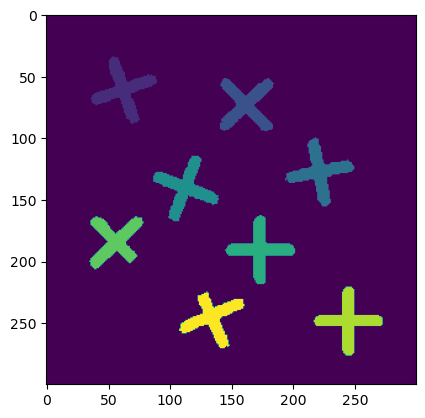

In [11]:
numLabels, labeledImage = getConnectedComponent(image)
print("#Labels: ", numLabels)
plt.imshow(labeledImage)